320 240


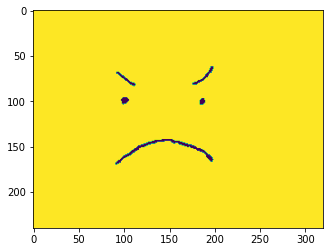

In [50]:
# Escrever um script em python que le
# uma tabela do excel
# e gera o código em assembly
# para gerar a imagem no LCD

# Ao invés de um excel, vou ler uma imagem
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('input.png')

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, img = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

rows,cols = img.shape

pixels = []

print(cols, rows)

def encontra_endereco(x, y):
    return (16384 + y*20, x%16)

for x in range(cols):
    for y in range(rows):
        k = img[y,x]
        if k == 0:
            pixels.append(encontra_endereco(x, y))

vals = {}
            
def set_one(string, pos):
    new = list(string)
    new[pos] = '1'
    return ''.join(new)
    
for p in pixels:
    if p[0] in vals:
        vals[p[0]] = set_one(vals[p[0]], p[1])
    else:
        vals[p[0]] = set_one('0000000000000000', p[1])
        
def memory_template(addr, val_dec):
    return f'''
leaw ${val_dec}, %A
movw %A, %D
leaw ${addr}, %A
movw %D, (%A)
'''
        
string_final = ''
    
for k in vals.keys():
    string_final += memory_template(k, int(vals[k], 2))
    
f = open("output.nasm", "w")
f.write(string_final)
f.close()    

plt.imshow(img)
plt.show()